In [27]:
# Import packages and classes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler


In [28]:
# Read the IceCreamData.csv file
LifeExpectancy=pd.read_csv('Life Expectancy Data.csv'); LifeExpectancy.columns = LifeExpectancy.columns.str.strip()
print(LifeExpectancy.dropna(subset=['Schooling','Life expectancy']))
# Print first 5 data
LifeExpectancy.dropna(subset=['Schooling','Life expectancy']).head()
# Print last 5 dat

          Country  Year      Status  Life expectancy  Adult Mortality  \
0     Afghanistan  2015  Developing             65.0            263.0   
1     Afghanistan  2014  Developing             59.9            271.0   
2     Afghanistan  2013  Developing             59.9            268.0   
3     Afghanistan  2012  Developing             59.5            272.0   
4     Afghanistan  2011  Developing             59.2            275.0   
...           ...   ...         ...              ...              ...   
2933     Zimbabwe  2004  Developing             44.3            723.0   
2934     Zimbabwe  2003  Developing             44.5            715.0   
2935     Zimbabwe  2002  Developing             44.8             73.0   
2936     Zimbabwe  2001  Developing             45.3            686.0   
2937     Zimbabwe  2000  Developing             46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  \
0                62     0.01               71

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [29]:
# IQR method for outlier removal (on Schooling and Life expectancy)
df = LifeExpectancy[['Schooling', 'Life expectancy']].dropna()
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [30]:
# Divide the data into “Attributes” and “labels”
X = df[['Schooling']]
y = df['Life expectancy']

In [31]:
# Split 80% of the data to the training set while 20% of the data to test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
# Create a Linear Regression model and fit it
regressor =LinearRegression(fit_intercept=True)
regressor.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [33]:
# Getting Results
print('Linear Model Coeff (m) =' , regressor.coef_)
print('Linear Model Coeff (b) =' , regressor.intercept_)

Linear Model Coeff (m) = [7.09929057]
Linear Model Coeff (b) = 69.66518518518518


In [34]:
# Predicting the data
y_predict=regressor.predict(X_test)
print(y_predict)

[67.86797017 63.05701278 52.06053875 78.40625779 65.57703808 75.19895286
 50.91507271 73.5953004  66.26431771 59.84970786 71.30436831 70.84618189
 75.42804607 69.01343622 68.32615659 77.26079174 72.90802077 66.95159734
 71.53346152 69.01343622 68.78434301 61.45336032 78.17716458 83.21721518
 61.68245353 80.46809667 54.35147084 72.67892756 62.59882637 70.84618189
 68.32615659 59.16242823 76.1153257  73.13711398 77.48988495 80.23900346
 73.82439361 71.76255473 67.40978375 74.05348682 70.15890226 66.26431771
 71.76255473 78.86444421 76.57351212 66.0352245  77.71897816 77.94807137
 68.5552498  73.82439361 58.70424181 70.15890226 62.14063995 74.28258003
 73.36620719 79.32263062 69.70071584 73.36620719 72.22074114 57.78786898
 66.49341092 77.03169853 69.92980905 54.12237763 65.57703808 54.12237763
 69.70071584 71.53346152 72.67892756 52.97691159 71.0752751  72.44983435
 67.40978375 67.86797017 56.87149614 77.71897816 71.30436831 74.51167323
 66.26431771 68.32615659 65.11885166 67.18069055 74

In [35]:
# Regression evaluation metrics
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R2 Score:", r2)

Mean Squared Error (MSE): 29.805386349966195
Root Mean Squared Error (RMSE): 5.459430954775982
Mean Absolute Error (MAE): 4.217610599288289
R2 Score: 0.617600846108012


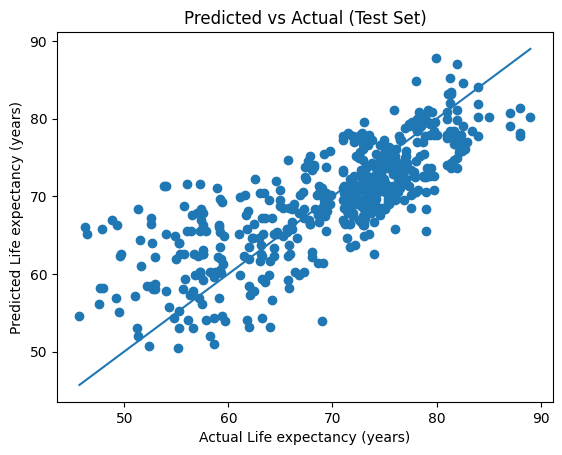

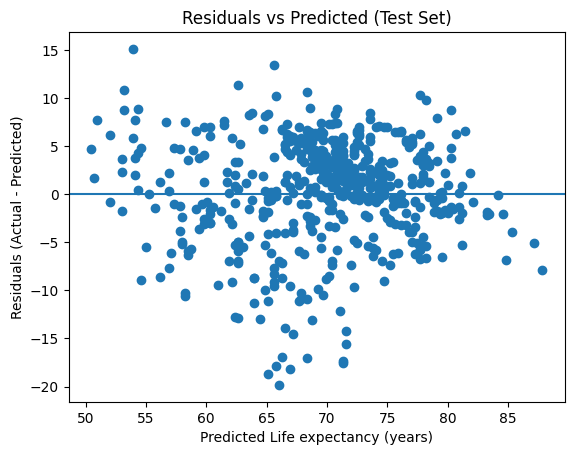

In [36]:
# Plot 1: Predicted vs Actual
plt.figure()
plt.scatter(y_test, y_predict)
plt.xlabel("Actual Life expectancy (years)")
plt.ylabel("Predicted Life expectancy (years)")
plt.title("Predicted vs Actual (Test Set)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])  # ideal line y=x
plt.show()

# Plot 2: Residuals plot
residuals = y_test - y_predict
plt.figure()
plt.scatter(y_predict, residuals)
plt.axhline(0)
plt.xlabel("Predicted Life expectancy (years)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted (Test Set)")
plt.show()


Text(0.5, 1.0, 'Life Expectancy vs. Schooling (Training)')

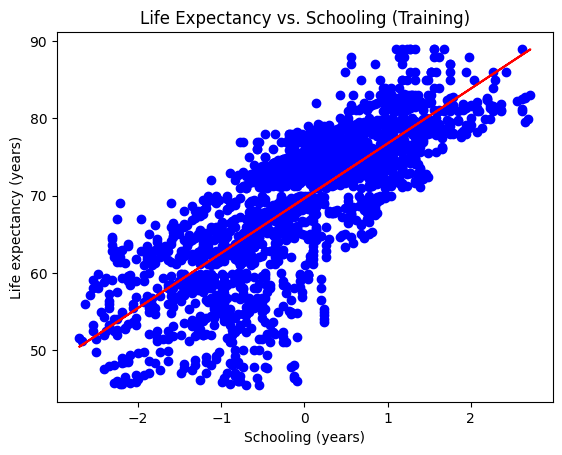

In [37]:
# Scatter plot on Training Data
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,regressor.predict(X_train),color='red')
plt.ylabel('Life expectancy (years)')
plt.xlabel('Schooling (years)')
plt.title('Life Expectancy vs. Schooling (Training)')

Text(0.5, 1.0, 'Life Expectancy vs. Schooling (Testing)')

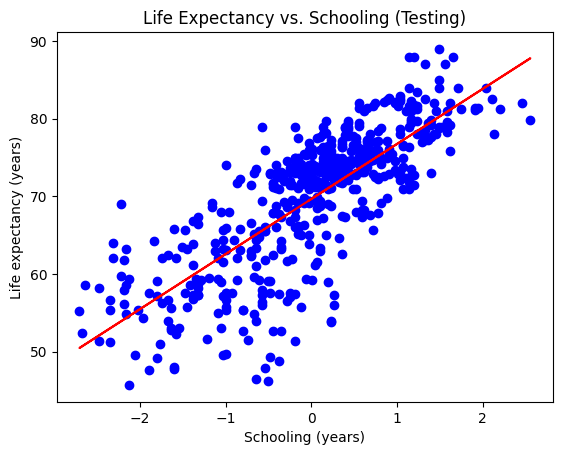

In [38]:
# Scatter plot on Testing Data
plt.scatter(X_test,y_test,color='blue')
plt.plot(X_test,regressor.predict(X_test),color='red')
plt.ylabel('Life expectancy (years)')
plt.xlabel('Schooling (years)')
plt.title('Life Expectancy vs. Schooling (Testing)')

In [39]:
# Prediction the LifeExpectancy using Schooling Value directly
print('---------0---------')
Temp = 0
pred = regressor.predict([[Temp]])
print(pred)
print('--------5----------')
Temp = 5
pred = regressor.predict([[Temp]])
print(pred)
print('--------10----------')
Temp = 10
pred = regressor.predict([[Temp]])
print(pred)

---------0---------
[69.66518519]
--------5----------
[105.16163803]
--------10----------
[140.65809087]
